
# Project: No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will be investigating the factors causing patients to not show up for their medical appointments in Brazil, using the 'Medical Appointment No Shows' dataset from Kaggle. For convenience purposes, I saved the CSV file as 'no_show.csv'.
I will be studying the influence of age and gender on appointment attendance. I will also investigate the relationship between receiving SMS messages and appointment attendance.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
df = pd.read_csv('no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#number of samples and columns in dataset
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#duplicate rows
df.duplicated().sum()

0

In [7]:
#summary of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> There are 110,527 samples and 14 columns in the dataset. The data types of 2 of the variables of interest ('No-show' and 'Gender') are undefined. There are no missing values or duplicate rows.

### Data Cleaning 

> I will be trimming down the dataset to columns I will be using for the analysis and verifying the data types of 'Gender' and 'No-show'.

In [8]:
#drop columns
df.drop(['AppointmentID', 'PatientId', 'Scholarship','ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], axis = 1, inplace = True)
df.head()

,Gender,Age,SMS_received,No-show
0,F,62,0,No
1,M,56,0,No
2,F,62,0,No
3,F,8,0,No
4,F,56,0,No


In [9]:
df.dtypes

Gender          object
Age              int64
SMS_received     int64
No-show         object
dtype: object

In [10]:
#data type of Gender
type(df['Gender'][0])

str

In [11]:
#data type of No-show
type(df['No-show'][0])

str

> The column 'No-show' shows the dependent variable, which states whether or not the patient attended the appointment. Take note
that 'No' means that the patient attended and 'Yes' means that the patient did not attend. The data type for this variable is a string. The dependent variables are 'Age', 'Gender' and 'SMS_received'. 'SMS_recevied' indicates whether or not the patient received one or more messages: 1 means that the patient received at least one message and 0 means the patient received no messages. The data type for this variable is a string.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: How do age and gender affect appointment attendance?

>I will answer the following questions:
>
>1. What are the mean and median ages of people who show up for appointments?
>2. What are the age distributions of people who show up and those who don't?
>3. Is there a gender disparity in appointment attendance?

In [12]:
# Mean age
df.groupby("No-show")["Age"].mean()

No-show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

In [13]:
# Median age
df.groupby("No-show")["Age"].median()

No-show
No     38
Yes    33
Name: Age, dtype: int64

> The mean age of people who show up for appointments is 37.8 and the median age is 38. The mean age of people who do not show up is 34.3 and the median is 33. There is a difference of about 5 years for both the mean and median. For each category, the  mean and median are close, so this indicates that the distributions are more or less symmetrical.

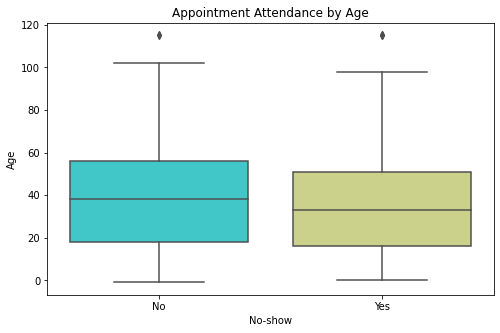

In [14]:
# Box plot showing age distribution
# Received help from towardsdatascience.com

plt.figure(figsize=(8,5))
sns.boxplot(x='No-show',y='Age',data=df, palette='rainbow')
plt.title("Appointment Attendance by Age");

> The median age of people who show up for appointments is slightly more than that of those who do not show up. The median may be in the centre for both box plots but the top whiskers are longer, showing that both distributions are skewed to the right.
>
> Source of code for box plot: https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

In [15]:
# Gender difference

> Both 'Gender' and 'No-show' are categorical variables and plotting them against each other is challenging. So, I will create a second data frame showing only 'No' values for No-show . This means that I will only be showing attendances. This will allow me to compare the value counts of both Male (M) and Female (F) with a bar graph.

In [16]:
#new data frame
df_g = df[df['No-show'] == 'No']
df_g.head()

,Gender,Age,SMS_received,No-show
0,F,62,0,No
1,M,56,0,No
2,F,62,0,No
3,F,8,0,No
4,F,56,0,No


In [17]:
# Number of males and females who showed up for appointments
df_g.groupby("No-show")["Gender"].value_counts()

No-show  Gender
No       F         57246
         M         30962
Name: Gender, dtype: int64

>There is a gender disparity in appointment attendance and females show up for appointments more than males. 57,746 females showed up, compared to only 30,962 males.

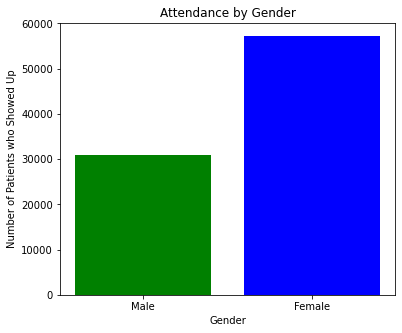

In [18]:
# Bar graph showing attendance by gender
x_axis = ['Male', 'Female']
y_axis = [30962, 57246]

plt.figure(figsize=(6, 5))
plt.bar(x_axis, y_axis, color=['green', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Patients who Showed Up')
plt.title('Attendance by Gender')
plt.show()

> As illustrated by the bar graph, more females than males show up for appointments.

### Research Question 2 : Are patients more likely to show up if they receive SMS notifications?

> I will be using the same data frame I created for analysing gender differences (df_g) for this question as SMS_received is also a categorical variable. I will be comparing the attendance numbers of people who received SMS messages to those who didn't.

In [19]:
# Attendance numbers of SMS recepients

df_g.groupby("No-show")["SMS_received"].value_counts()

No-show  SMS_received
No       0               62510
         1               25698
Name: SMS_received, dtype: int64

> Attendance is greater for people who did not receive SMS messages i.e., 'SMS_received' = 0. 
>
> 62,510 patients who did not receive an SMS showed up, as compared to 25,698 who received at least one SMS.

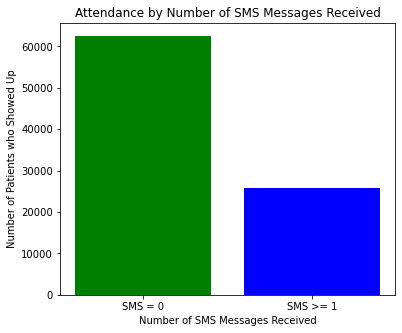

In [20]:
# Bar graph showing number of attendants who received messages and those who didn't 
x_values = ['SMS = 0', 'SMS >= 1']
y_values = [62510, 25698]

plt.figure(figsize=(6, 5))
plt.bar(x_values, y_values, color=['green', 'blue'])
plt.xlabel('Number of SMS Messages Received')
plt.ylabel('Number of Patients who Showed Up')
plt.title('Attendance by Number of SMS Messages Received')
plt.show()


> As illustrated by the bar graph, attendance is greater for patients who did not receive SMS messages.

<a id='conclusions'></a>
## Conclusions

#### Results:
> 1. The median age of patients who show up for appointments is slightly more than that of patients who do not show up (38 > 33).
> 2. There is a gender disparity is appointment attendance and more females (57,246) than males (30,962) show up for appointments.
> 3. More patients who do not receive SMS messages (62,510) show up than patients who receive SMS messages (25,698).
>
#### Limitations:
> 1. I did not perform any statistical tests to check if the difference in median ages of patients who show up and those who do not is statistically significant.
> 2. The details provided about the SMS_received variable are vague. It is not clear if these messages were pre-appointment reminders or were sent post-appointment. One would assume that patients who receive SMS messages have a greater likelihood of attendance, but without further details on the variable, the results are not conclusive.
> 3. Most of the variables in the dataset are categorical, so it is difficult to perform detailed statistical analysis.
